# Introduction to Data Science - 22KDL
## Lab02 -  Principal Component Analysis
### 22280012 - Nguyen Xuan Viet Duc

### Import the dataset:
The dataset has been downloaded from [ https://www.kaggle.com/datasets/varunraskar/cancer-regression/data](URL).

### About Dataset
- The dataset contains 2 .csv files

- This file contains various demographic and health-related data for different regions.

In [1]:
import pandas as pd

df1 = pd.read_csv('cancer_reg.csv')
df1.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [2]:
#View the basic information of the first dataset.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [3]:
#identify duplicate rows
duplicateRows1 = df1[df1.duplicated()]

#view duplicate rows
duplicateRows1

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate


- Second dataset: This file contains demographic information about different regions, including details about household size and geographical location.

In [4]:
df2 = pd.read_csv('avg-household-size.csv')
df2.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [5]:
#View dataset information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


In [6]:
#identify duplicate rows
duplicateRows2 = df2[df2.duplicated()]

#view duplicate rows
duplicateRows2

,statefips,countyfips,avghouseholdsize,geography


### Data Preprocessing: 
- After examining the two datasets, I observed that they both have a 'geography' column. Therefore, I will join the two data frames into one based on the 'geography' column.
- After that, I will drop the 'geography' column.

In [7]:
df = df1.merge(df2, on = 'geography' , how = 'inner')
df = df.drop(columns = 'geography')
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34


- Data after joining two tables

In [8]:
#Check for null values in the dataset.
df.isnull().sum() 

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarriedhouseholds          0
birthrat

In [9]:
import re

#The function is used to split the two boundaries of the 'binnedinc' column.
def parse_range(range_str):
    numbers = re.findall(r'\d+', range_str)
    return int(numbers[0]), int(numbers[1])

In [10]:
df['binnedinc'] = df['binnedinc'].apply(lambda x: parse_range(x))

# Calculate the average or median value of each interval.
df['binnedinc_numeric'] = df['binnedinc'].apply(lambda x: (x[0] + x[1]) / 2)  # Giá trị trung bình

# Delete the 'binnedinc' column.
df.drop(columns=['binnedinc'], inplace=True)

# Print out the transformed DataFrame
df

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,binnedinc_numeric
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54,30749.5
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34,24013.5
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62,24013.5
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52,21364.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34,24013.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,20,53,2.08,46611.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,20,55,2.90,24013.5
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,20,57,3.04,25525.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,20,59,2.56,24013.5


Using KNNImputer to fill in missing values in columns with missing values

In [11]:
from sklearn.impute import KNNImputer

# Create a transformer for missing data using KNN (K-Nearest Neighbors).
def knn_imputer(column):
    knn_imputer = KNNImputer(n_neighbors = 5)  # Selecting 5 neighbors

    # Fill in missing values in the column using KNN
    df_filled = knn_imputer.fit_transform(df[[column]])

    return df_filled


In [12]:
df['pctemployed16_over'] = knn_imputer('pctemployed16_over')
df['pctprivatecoveragealone'] = knn_imputer('pctprivatecoveragealone')

df['pctemployed16_over'].info()
df['pctprivatecoveragealone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3047 entries, 0 to 3046
Series name: pctemployed16_over
Non-Null Count  Dtype  
--------------  -----  
3047 non-null   float64
dtypes: float64(1)
memory usage: 23.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 3047 entries, 0 to 3046
Series name: pctprivatecoveragealone
Non-Null Count  Dtype  
--------------  -----  
3047 non-null   float64
dtypes: float64(1)
memory usage: 23.9 KB


In [13]:
df = df.drop(columns = ['pctsomecol18_24'])

In [14]:
df['target_deathrate'].describe()

count    3047.000000
mean      178.664063
std        27.751511
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       362.800000
Name: target_deathrate, dtype: float64

Perform outlier removal for the target column to enhance model performance.Utilize quartiles to perform outlier removal

In [15]:
#The function performs outlier removal.
def remove_outliers_iqr(df, column_name):

    #Identifying Interquartile Range (IQR):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    #Defining Outlier Thresholds:
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Filtering Outliers:
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered

In [16]:
#Call the function to remove outliers for the 'target_deathrate' column.
df = remove_outliers_iqr(df, 'target_deathrate')
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,binnedinc_numeric
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54,30749.5
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34,24013.5
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62,24013.5
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52,21364.0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34,24013.5


Split the dataset into two parts:
- Features dataset.
- Target dataset.

In [17]:
features = df.drop(columns = 'target_deathrate')
target = df['target_deathrate']

In [18]:
N, d = features.shape

print("Num. samples: ", N)
print("Num. features/variables: ", d)

Num. samples:  2983
Num. features/variables:  33


After splitting, we obtained a feature set with 2983 data samples and 33 features

In [19]:
target.info()

<class 'pandas.core.series.Series'>
Index: 2983 entries, 0 to 3046
Series name: target_deathrate
Non-Null Count  Dtype  
--------------  -----  
2983 non-null   float64
dtypes: float64(1)
memory usage: 46.6 KB


In [20]:
features_std = (features - features.mean(axis = 0))/features.std(axis = 0, ddof = 1)
features_std.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,binnedinc_numeric
0,0.547389,0.549794,0.811211,1.228679,0.468360,-0.891492,0.652884,-0.131238,-0.509999,-0.083697,...,-0.118750,-0.451036,1.350442,-0.042160,0.235803,0.244269,1.500511,-0.636514,0.039382,0.589561
1,-0.309381,-0.234105,-0.703828,0.076943,-0.184229,0.298915,-0.250460,-0.271215,-1.410849,-1.599600,...,0.342094,-0.564263,0.372152,0.495108,-0.913042,-0.664504,1.500511,-0.617442,-0.771368,-0.244703
2,-0.359079,-0.273398,-1.903073,0.179062,-0.251164,-0.344548,-0.204123,-0.004593,0.850861,0.693203,...,0.446891,-0.580243,-0.304065,0.213718,0.479707,-0.971684,1.500511,-0.598371,0.363683,-0.244703
3,-0.131587,0.025230,-0.339599,-0.247894,-0.086089,0.057616,0.355120,-0.053473,0.505854,0.238432,...,0.497783,-0.577251,-0.039911,-0.178280,-0.045831,-0.526720,1.500511,-0.579300,-0.041693,-0.572848
4,-0.390578,-0.320550,-1.895323,0.229828,-0.283377,-0.682366,-0.294261,0.068728,1.579208,1.280615,...,0.643767,-0.612943,-0.228126,-0.424712,0.415629,0.589219,1.500511,-0.560228,-0.771368,-0.244703


In [21]:
target_std = (target - target.mean(axis = 0))/target.std(axis = 0, ddof = 1)
target_std.head()

0   -0.523018
1   -0.666774
2   -0.131684
3    0.670951
4   -1.341626
Name: target_deathrate, dtype: float64

### Implement PCA and Interpretation and Analysis:

In [22]:
# Fitting Our Data to a PCA Model
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features_std)

PCA()

After fitting the PCA model, retrieves the explained_variance_ratio_ attribute from the pca object. This attribute is an array that represents the proportion of variance explained by each principal component.

In [23]:
pca.explained_variance_ratio_

array([0.27324817, 0.15659098, 0.07805728, 0.0651843 , 0.0416573 ,
       0.03635242, 0.03380183, 0.03143493, 0.02960025, 0.02872535,
       0.02645051, 0.02499546, 0.02353331, 0.02140677, 0.02030815,
       0.01707988, 0.01535408, 0.01455787, 0.01174101, 0.0095637 ,
       0.00745042, 0.00682283, 0.00545583, 0.00397506, 0.00390803,
       0.00277656, 0.00246159, 0.00204669, 0.00178956, 0.00166158,
       0.00094068, 0.00055838, 0.00050925])

Calculates the explained variance ratio for each component (expl_var).
A DataFrame (df_expl_var) is created to organize the data. It includes:
- The component number (PCA)
- The explained variance ratio for each component (Explained Variance (%))
- The cumulative explained variance up to that component (Total Explained Variance (%))

In [24]:
# Exploring our PCA Data
expl_var = pca.explained_variance_ratio_
df_expl_var = pd.DataFrame(data=zip(range(1, len(expl_var) + 1), expl_var, expl_var.cumsum()),         
    columns=['PCA', 'Explained Variance (%)', 'Total Explained Variance (%)']
    ).set_index('PCA').mul(100).round(1)
print(df_expl_var)

     Explained Variance (%)  Total Explained Variance (%)
PCA                                                      
1                      27.3                          27.3
2                      15.7                          43.0
3                       7.8                          50.8
4                       6.5                          57.3
5                       4.2                          61.5
6                       3.6                          65.1
7                       3.4                          68.5
8                       3.1                          71.6
9                       3.0                          74.6
10                      2.9                          77.5
11                      2.6                          80.1
12                      2.5                          82.6
13                      2.4                          85.0
14                      2.1                          87.1
15                      2.0                          89.1
16            

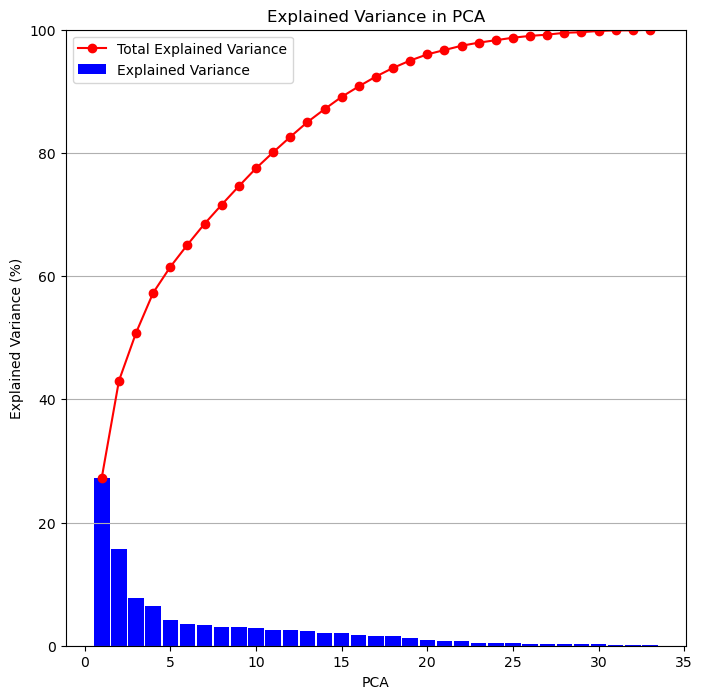

In [25]:
# Plotting our explained variance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x=df_expl_var.index, height=df_expl_var['Explained Variance (%)'], label='Explained Variance', width=0.9, color='blue')
ax.plot(df_expl_var['Total Explained Variance (%)'], label='Total Explained Variance', marker='o', c='red')

plt.ylim(0, 100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('PCA')
plt.grid(True, axis='y')
plt.title('Explained Variance in PCA')
plt.legend()

Based on the observations, it seems that PCA can effectively reduce the dimensionality of the data while preserving a significant portion of the variance. The first few PCs likely capture the most important patterns in the data, and retaining these PCs may be sufficient for further analysis or modeling.
- Specific Domain Knowledge: The interpretation of the PCs and their importance may depend on the specific domain and the nature of the data. Expertise in the field can help in understanding the patterns captured by the PCs.
- Dimensionality Reduction Goal: The number of PCs to retain depends on the specific goal of dimensionality reduction. If the goal is to capture as much variance as possible while minimizing dimensionality, the elbow point can be a guide. However, if the goal is to focus on the most important patterns, fewer PCs may be sufficient.
- Model Performance: Ultimately, the choice of PCs should be guided by the performance of the resulting reduced-dimensional data in subsequent analysis or modeling tasks.

First, I'll try using PCA to reduce the data to one dimension

In [26]:
# Fitting and Transforming Our Data Using PCA
pca1 = PCA(1)
features_pca1 = pca1.fit_transform(features_std)

In [27]:
print(features_pca1.shape)
print(target.shape)

(2983, 1)
(2983,)


Visualize the data after PCA reduction to one dimension.

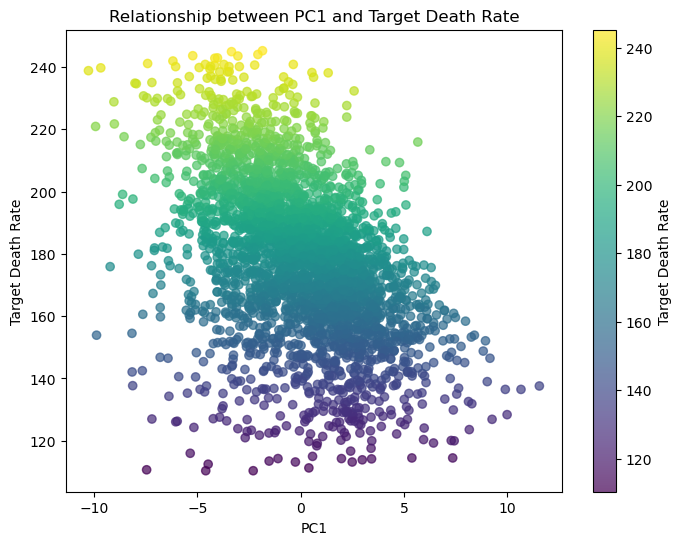

In [28]:
# Scatter plot with coloring based on target values
plt.figure(figsize=(8, 6))
plt.scatter(features_pca1, target, c = target, cmap='viridis', alpha=0.7)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('Target Death Rate')
plt.title('Relationship between PC1 and Target Death Rate')

# Colorbar
plt.colorbar(label='Target Death Rate')

# Show the plot
plt.show()

Observing the graph, we notice that the death rate ranges from approximately 110 to 150 distributed evenly across the -10 to 10 range of PC1. However, as the death rate increases gradually, the PC1 values tend to lean more towards the range of -10 to 0.
In general, the PC1 plot seems to be easy to understand.

In [29]:
explained_variance_ratio1 = pca1.explained_variance_ratio_[0]
print("Explained Variance Ratio (PC1):", explained_variance_ratio1)

Explained Variance Ratio (PC1): 0.2732481659272227


The Explained Variance Ratio value (PC1) = 0.2732481659272225 indicates that the first principal component (PC1) in the Principal Component Analysis (PCA) process explains 27.32% of the data variance.

In [30]:
pca1.components_

array([[ 0.09553293,  0.07260515,  0.01744542,  0.28719837,  0.07664457,
        -0.28679926,  0.03525674, -0.00687093, -0.02714367, -0.04949906,
         0.15720794, -0.15049674, -0.10207574,  0.19302585, -0.14391517,
         0.25093601,  0.27439195, -0.22408752,  0.29891929,  0.2830313 ,
         0.28136667, -0.28324152, -0.29410839,  0.13336595, -0.14478591,
         0.11684094, -0.00436379,  0.1615023 , -0.00820041,  0.03467557,
        -0.02172137, -0.01985329,  0.09994801]])

After that, let's try with PCA with 2 components.

In [31]:
pca2 = PCA(2)
features_pca2 = pca2.fit_transform(features_std)

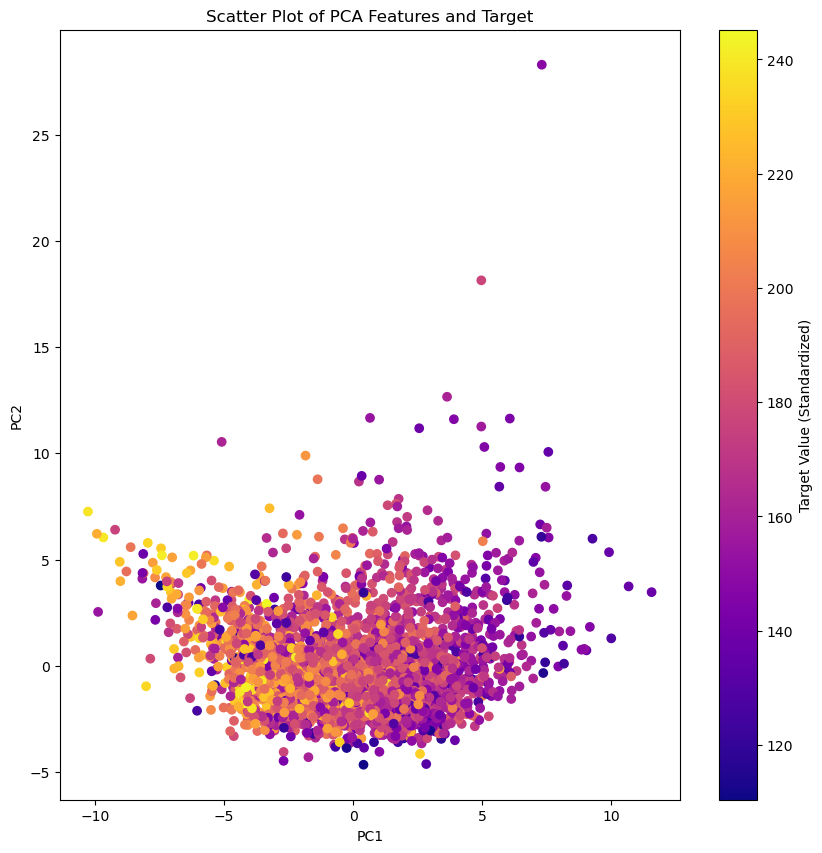

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(features_pca2[:,0],features_pca2[:,1],c = target ,cmap='plasma')

plt.colorbar(label='Target Value (Standardized)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PCA Features and Target')
plt.show()

In [33]:
explained_variance_ratio2 = pca2.explained_variance_ratio_
print("Explained Variance Ratio (PC2):", explained_variance_ratio2)

Explained Variance Ratio (PC2): [0.27324817 0.15659098]


The PCA plot with 2 components appears to be more challenging to interpret even though the Total Explained Variance reaches 43.0%.

In [34]:
pca_diabetes = pd.DataFrame(data = features_pca2, columns = ['PC1', 'PC2'])
pca_diabetes.head(6)

,PC1,PC2
0,2.403793,1.094766
1,1.770602,1.773253
2,-0.405528,-1.160617
3,-2.089251,-0.766916
4,-0.561215,-2.682647
5,-1.761444,-0.515003


In [35]:
import matplotlib.pyplot as plt

def biplot(score,coef,labels=None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,c = target ,cmap='viridis')
    plt.colorbar(label='Target Death Rate')
    
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'red',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'orange', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()

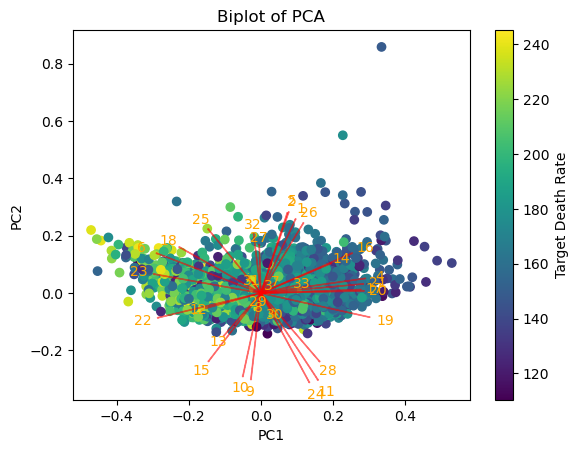

<Figure size 640x480 with 0 Axes>

In [36]:
import numpy as np
plt.title('Biplot of PCA')
 
biplot(features_pca2, 
       np.transpose(pca2.components_), 
       list([num for num in range(1, 35)]))

1: avganncount; 2: avgdeathsperyear; 3: incidencerate; 4: medincome; 5: popest2015; 6: povertypercent; 7: studypercap; 8: medianage; 9: medianagemale; 10: medianagefemale; 11: percentmarried; 12: pctnohs18_24; 13: pcths18_24; 14: pctbachdeg18_24; 15: pcths25_over; 16: pctbachdeg25_over; 17: pctemployed16_over; 18: pctunemployed16_over; 19: pctprivatecoverage; 20: pctprivatecoveragealone; 21: pctempprivcoverage; 22: pctpubliccoverage; 23: pctpubliccoveragealone; 24: pctwhite; 25: pctblack; 26: pctasian; 27: pctotherrace; 28: pctmarriedhouseholds; 29: birthrate; 30: statefips; 31: countyfips; 32: avghouseholdsize; 33: binnedinc_numeric

- PC1: PC1 appears to be associated with variables such as the proportion of White individuals, the proportion of Black individuals, the proportion of Asian individuals, and the proportion of individuals of other races. This suggests that areas with higher proportions of White individuals tend to have lower target mortality rates, while areas with higher proportions of Black, Asian, or other racial individuals tend to have higher target mortality rates.

- PC2: PC2 seems to be related to variables such as the marriage rate, the birth rate, and the unemployment rate. This indicates that areas with higher marriage rates and lower birth rates tend to have higher target mortality rates, while areas with higher unemployment rates tend to have lower target mortality rates.
- The data points are fairly evenly distributed on the biplot, indicating that there are no clearly separated clusters of data samples.
- 
However, some trends can still be observed. For example, data points in the upper right corner of the biplot appear to be associated with areas with high proportions of White individuals, high marriage rates, and low birth rates. Conversely, data points in the lower left corner of the biplot seem to be related to areas with high proportions of Black, Asian, or other racial individuals, low marriage rates, and high birth rates.

Finally, I'll try with PCA with 3 components

In [37]:
pca3 = PCA(3)
features_pca3 = pca3.fit_transform(features_std)

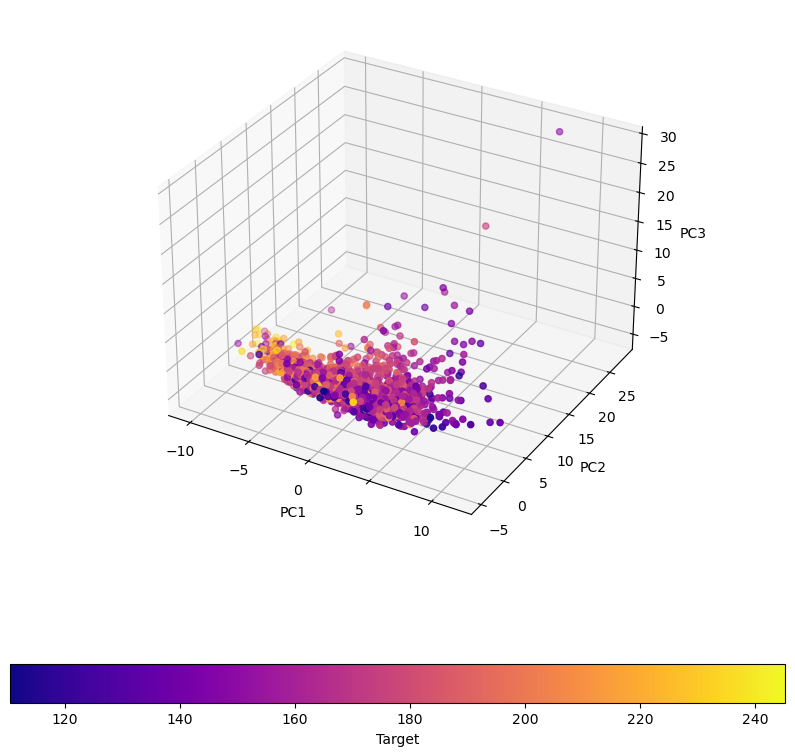

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')

# Draw a scatter plot and add a colorbar for the target variable.
sc = axis.scatter(features_pca3[:,0], features_pca3[:,1], features_pca3[:,2], c=target, cmap='plasma')
cbar = plt.colorbar(sc, orientation='horizontal')
cbar.set_label('Target', fontsize=10)

axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

plt.show()


In [39]:
print("Explained Variance Ratio (PC3):", pca3.explained_variance_ratio_)

Explained Variance Ratio (PC3): [0.27324817 0.15659098 0.07805727]


A three-dimensional plot for PCA with 3 components, even though the total explained variance exceeds 50%, seems to be very challenging to interpret at first glance. We observe that the data points are distributed evenly throughout the plot, making it quite visually cluttered.

### Dimensionality Reduction:
- First, perform linear regression on the original dataset.

In [40]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets for the machine learning model.
X_train, X_test, y_train, y_test = train_test_split(features_std, target, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.linear_model import LinearRegression

#Fit the model.
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_test = linear.predict(X_test)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)
print('Mean square error is ',mse)
print('R2 score is ',r2)

Mean square error is  345.6855472662978
R2 score is  0.4709282110119024


- Mean square error (MSE) is a measure of the average difference between actual and predicted values. In this case, the MSE is 345.6855, indicating that the average of the squared differences between actual and predicted values is approximately 345.68. Lower MSE values suggest that the model fits the data better.
-R-squared (R2) is a measure of the proportion of the variance in the dependent variable that is explained by the independent variables. The value of 0.4709 indicates that approximately 47.09% of the variance in the target variable is explained by the independent variables in the model. 

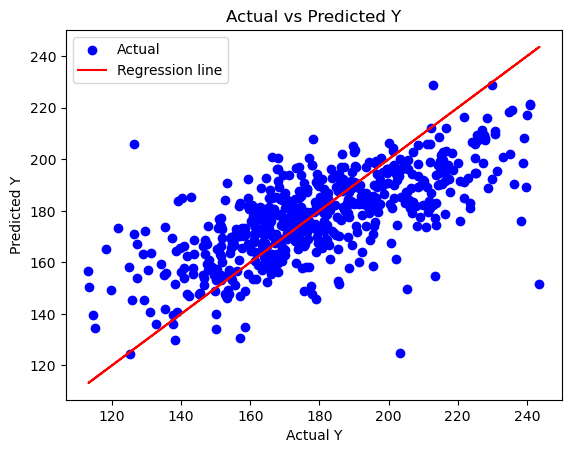

In [43]:
plt.scatter(y_test, pred_test, color='blue', label='Actual')

plt.plot(y_test, y_test, color='red', label='Regression line')

plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Y')
plt.legend()

plt.show()

I will try using a linear regression model for the data after PCA with 1 component, 2 components, and 3 components

In [44]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(features_pca1, target, test_size = 0.2, random_state = 42)

In [45]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X1_train,y1_train)
pred_test1 = linear.predict(X1_test)

In [46]:
mse = mean_squared_error(y1_test, pred_test1)
r2 = r2_score(y1_test, pred_test1)
print('Mean square error is ',mse)
print('R2 score is ',r2)

Mean square error is  514.179928293115
R2 score is  0.21304753214271255


After using linear regression on the data after PCA with 1 component, we observe the following:
- The mean square error (MSE) is 514.1799, indicating that, on average, the squared difference between the actual and predicted values is approximately 514.18. This suggests that the model's predictive accuracy is not very high, as the error is relatively large.
- The R-squared (R2) score is 0.2130, implying that approximately 21.30% of the variance in the target variable is explained by the independent variables in the model. This indicates that the model's ability to explain the variability in the target variable is limited, as the R2 score is relatively low.

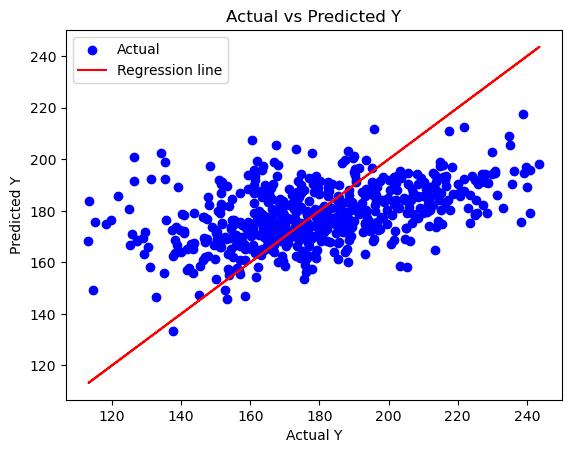

In [47]:
plt.scatter(y1_test, pred_test1, color='blue', label='Actual')

plt.plot(y1_test, y1_test, color='red', label='Regression line')

plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Y')
plt.legend()

plt.show()

In [48]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(features_pca2, target, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X2_train,y2_train)
pred_test2 = linear.predict(X2_test)

In [50]:
mse = mean_squared_error(y2_test, pred_test2)
r2 = r2_score(y2_test, pred_test2)
print('Mean square error is ',mse)
print('R2 score is ',r2)

Mean square error is  515.3474229230358
R2 score is  0.21126068141270393


After using linear regression on data with PCA 2 components:
- The mean square error (MSE) is 515.3474, indicating that, on average, the squared difference between the actual and predicted values is approximately 515.35. This suggests that the model's predictive accuracy remains relatively low, with a similar level of error compared to when using PCA with 1 component.
- The R-squared (R2) score is 0.2113, implying that approximately 21.13% of the variance in the target variable is explained by the independent variables in the model. Similar to the case with PCA 1 component, this suggests that the model's ability to explain the variability in the target variable is limited, as the R2 score remains relatively low.

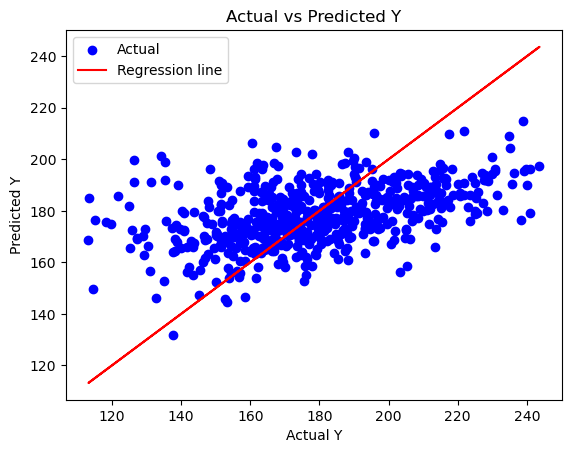

In [51]:
plt.scatter(y2_test, pred_test2, color='blue', label='Actual')

plt.plot(y2_test, y2_test, color='red', label='Regression line')

plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Y')
plt.legend()

plt.show()

I will try PCA with 80% of the data information retained

In [52]:
from sklearn.decomposition import PCA
# Fitting and Transforming Our Data Using PCA
pca_t = PCA(0.8)
features_pca_t = pca_t.fit_transform(features_std)

In [53]:
features_pca_t.shape

(2983, 11)

To retain 80% of the data information, I require 11 components to function properly

In [54]:
from sklearn.model_selection import train_test_split

Xt_train, Xt_test, yt_train, yt_test = train_test_split(features_pca_t, target, test_size = 0.2, random_state = 42)

Perform linear regression on 80% of the data after dimensionality reduction to 11 components using PCA.

In [55]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(Xt_train,yt_train)
pred_testt = linear.predict(Xt_test)

In [59]:
mse = mean_squared_error(yt_test, pred_testt)
r2 = r2_score(yt_test, pred_testt)
print('Mean square error is ',mse)
print('R2 score is ',r2)

Mean square error is  372.4712083969936
R2 score is  0.42993275208769943


- The mean square error (MSE) is 372.4712, indicating that, on average, the squared difference between the actual and predicted values is approximately 372.47. This suggests that the model's predictive accuracy has improved compared to the previous scenarios, as the error has decreased.
- The R-squared (R2) score is 0.4299, implying that approximately 42.99% of the variance in the target variable is explained by the independent variables in the model. This indicates that the model's ability to explain the variability in the target variable has also improved, as the R2 score has increased. However, it's still not a very high R2 score, suggesting that there may be room for further improvement in the model.
- However, we observe that the two metrics are lower than the model with the original data without PCA.

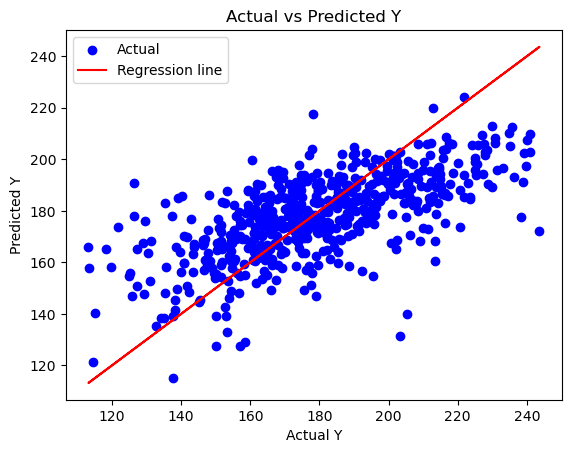

In [57]:
plt.scatter(yt_test, pred_testt, color='blue', label='Actual')

plt.plot(yt_test, yt_test, color='red', label='Regression line')

plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Y')
plt.legend()

plt.show()

### Conclusion:

Principal Component Analysis (PCA) is a popular dimensionality reduction technique widely used in various fields, including machine learning, natural language processing, and image analysis. PCA aims to reduce the number of variables in a dataset to a subset of new variables while preserving as much information as possible from the original dataset
- Advantages
1. Dimensionality Reduction: PCA helps reduce the number of variables in a dataset, making data analysis and processing easier and more efficient.
2. Noise Reduction: PCA can help remove noise from data, improving the accuracy of machine learning models.
3. Performance Improvement: Reducing the number of variables can lead to improved performance of machine learning algorithms.
4. Data Exploration: PCA can aid in discovering hidden structures in data, providing insights into the relationships between variables.
5. Ease of Understanding: PCA is a relatively easy-to-understand technique and can be visualized easily.
- Disadvantages
1. Information Loss: Reducing the number of variables inevitably leads to some loss of information from the original data.
2. Difficulty in Interpretation: Interpreting the meaning of principal components can be challenging, especially when they are linear combinations of multiple original variables.
3. Sensitivity to Noise: PCA can be sensitive to noise in data, potentially leading to inaccurate results.
4. Ineffectiveness in Certain Cases: PCA may not always be effective in dimensionality reduction, particularly when variables in the dataset are not correlated.

PCA is a powerful dimensionality reduction technique with both advantages and disadvantages. Its suitability depends on the specific purpose of data analysis and the characteristics of the dataset.